## Problem Definition
Credit scoring is the process of assessing the creditworthiness of an individual or business. This process is used by lenders to determine whether or not to approve a loan application and what interest rate to charge. Creditworthiness is typically assessed based on a number of factors, including the applicant's credit history, income, employment history, and debt-to-income ratio.

## Objective
The objective of a credit score prediction project is to develop a machine learning model that can accurately predict credit scores. This model can then be used by lenders to make more informed decisions about loan applications.

# Credit Score Prediction


## Data Description
- ID: Represents a unique identification of an entry
- Customer_ID: Represents a unique identification of a person
- Month: Represents the month of the year
- Name: Represents the name of a person
- Age: Represents the age of the person
- SSN: Represents the social security number of a person
- Occupation: Represents the occupation of the person
- Annual_Income: Represents the annual income of the person
- Monthly_Inhand_Salary: Represents the monthly base salary of a person
- Num_Bank_Accounts: Represents the number of bank accounts a person holds
- Num_Credit_Card: Represents the number of other credit cards held by a person
- Interest_Rate: Represents the interest rate on credit card
- Num_of_Loan: Represents the number of loans taken from the bank
- Type_of_Loan: Represents the types of loan taken by a person
- Delay_from_due_date: Represents the average number of days delayed from the    payment date
- Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments
- Amount_invested_monthly: Represents the monthly amount invested by the customer
- Payment_Behaviour: Represents the payment behavior of the customer
- Monthly_Balance:Represents the monthly balance amount of the customer
- Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) ((Target))


In [1070]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.metrics import classification_report , accuracy_score , recall_score
from sklearn.model_selection import train_test_split

In [966]:
df=pd.read_csv("/home/kartik/Documents/DBDA_PROJECT/credit/archive/train.csv");

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3526: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [967]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [968]:
df.shape

(100000, 28)

In [969]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [970]:
df.isnull().sum()/len(df)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [971]:
dfnew=df.dropna()
dfnew

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [972]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  object 
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_

In [973]:
data_lost=(len(df)-len(dfnew))*100/len(df)
f"Data Lost-{data_lost:0.2f} %"

'Data Lost-46.95 %'

In [974]:
df.drop("Name",axis=1,inplace=True)


In [975]:
df.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [976]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  in

In [977]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


<Axes: >

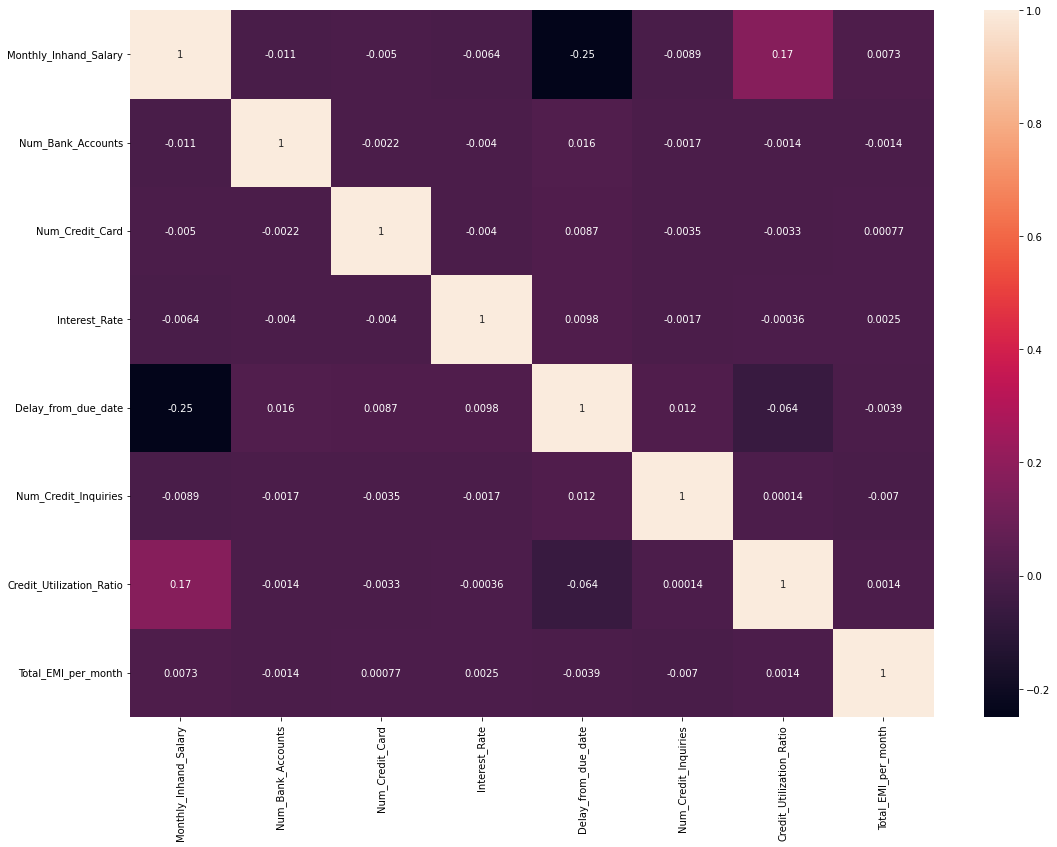

In [978]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(),annot=True)

In [979]:
# sns.pairplot(df)

# ---------------Credit_Score------------------

In [980]:
df["Credit_Score"]

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

In [981]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["credit__score_label"]=lb.fit_transform(df["Credit_Score"])

good=0
standard=2
poor=1

In [982]:
df.drop("Credit_Score",axis=1,inplace=True)

<Axes: >

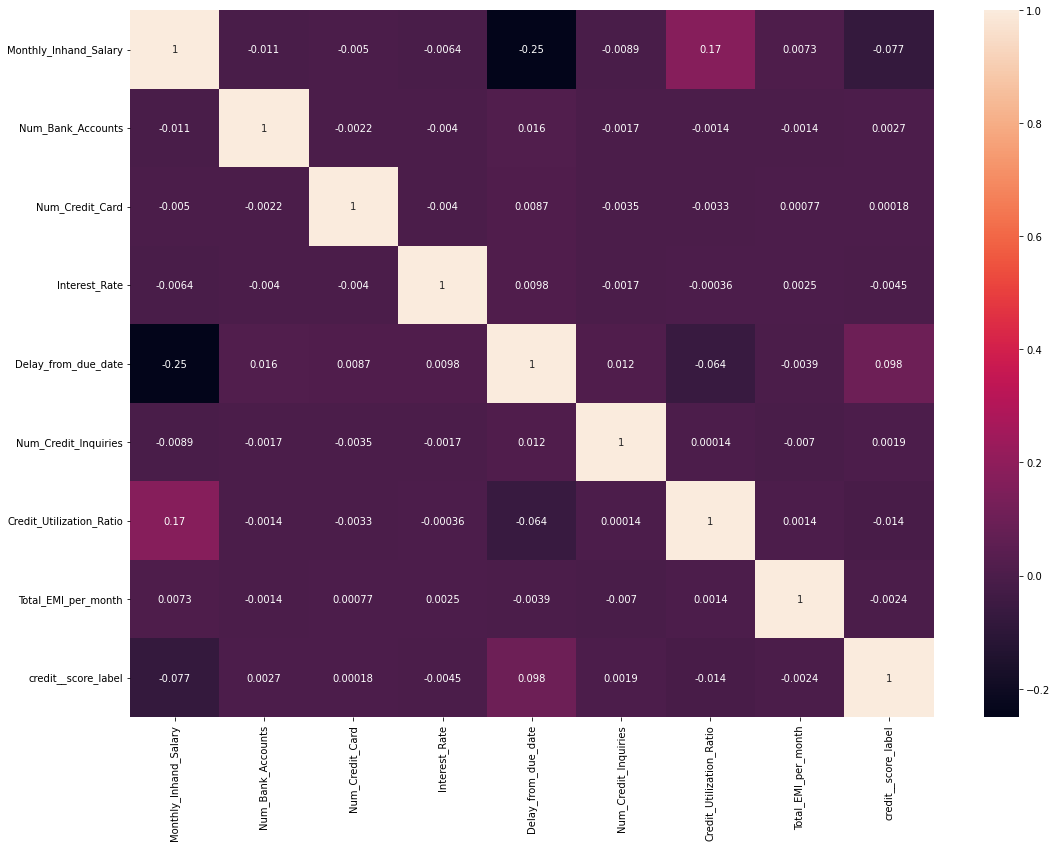

In [983]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(),annot=True)

array([[<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'credit__score_label'}>]], dtype=object)

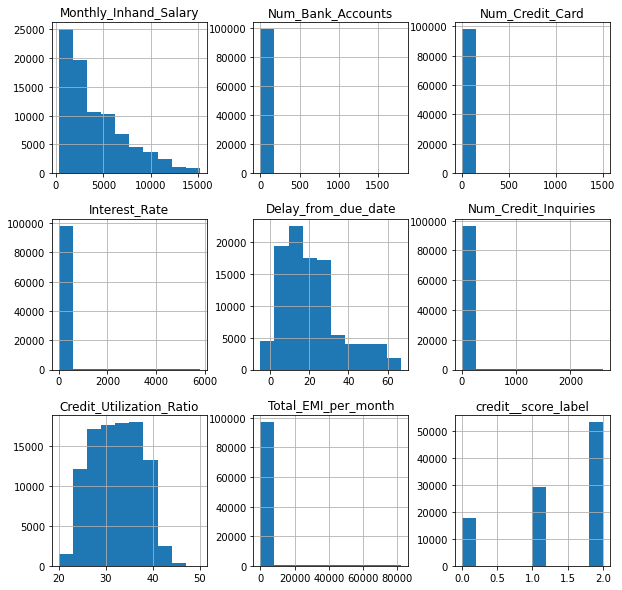

In [984]:
df.hist(figsize=(10,10))

In [985]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'credit__score_label'],
      dtype='object')

here a lot of columns are out of model scope ,redundant and not so useful in this particular context of the issue at the hand so we have to drop them,name column was already dropped

In [986]:
#Drop the column 

drop_df = df.drop(['ID','Customer_ID','Month','SSN','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Amount_invested_monthly'], axis=1).copy()
drop_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
0,23,Scientist,19114.12,1824.843333,3,7,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,0
1,23,Scientist,19114.12,NaN,-1,NaN,4.0,Good,809.98,31.944960,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,0
2,-500,Scientist,19114.12,NaN,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,0
3,23,Scientist,19114.12,NaN,5,4,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,0
4,23,Scientist,19114.12,1824.843333,6,NaN,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,23,7,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,1
99996,25,Mechanic,39628.99,3359.415833,18,7,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,1
99997,25,Mechanic,39628.99,3359.415833,27,6,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,1
99998,25,Mechanic,39628.99,3359.415833,20,NaN,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,2


# ----------AGE----------------

In [987]:
drop_df["Age"]

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [988]:
# non_numeric_age = drop_df[~drop_df["Age"].str.isnumeric()]

In [989]:
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [990]:
type(df["Age"])

pandas.core.series.Series

In [991]:
drop_df["Age"] = drop_df["Age"].apply(filter_col)
drop_df["Age"] = drop_df["Age"].astype(int)


In [992]:
for i in range(len(drop_df["Age"])):
    if drop_df["Age"][i] > 90 or drop_df["Age"][i] < 10:
        drop_df["Age"][i] = np.nan
    else:
        drop_df["Age"][i] = drop_df["Age"][i]

/tmp/ipykernel_4486/2827531744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df["Age"][i] = drop_df["Age"][i]
/tmp/ipykernel_4486/2827531744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df["Age"][i] = np.nan
/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [993]:
drop_df["Age"]

0        23.0
1        23.0
2         NaN
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

In [994]:
# non_numeric_age = drop_df[~drop_df["Age"].str.isnumeric()]

In [995]:
# drop_df["Age"] = pd.to_numeric(drop_df["Age"], errors="coerce")

In [996]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       97219 non-null   float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    92998 non-null   object 
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  object 
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Credit_History_Age        90970 non-null   object 
 11  Payment_of_Min_Amount     100000 non-null  object 
 12  Total_EMI_per_month       100000 non-null  float64
 13  Payment_Behaviour         100000 non-null  ob

In [997]:
# drop_df.dropna(subset=["Age"],inplace=True)
# drop_df.reset_index(drop=True, inplace=True)

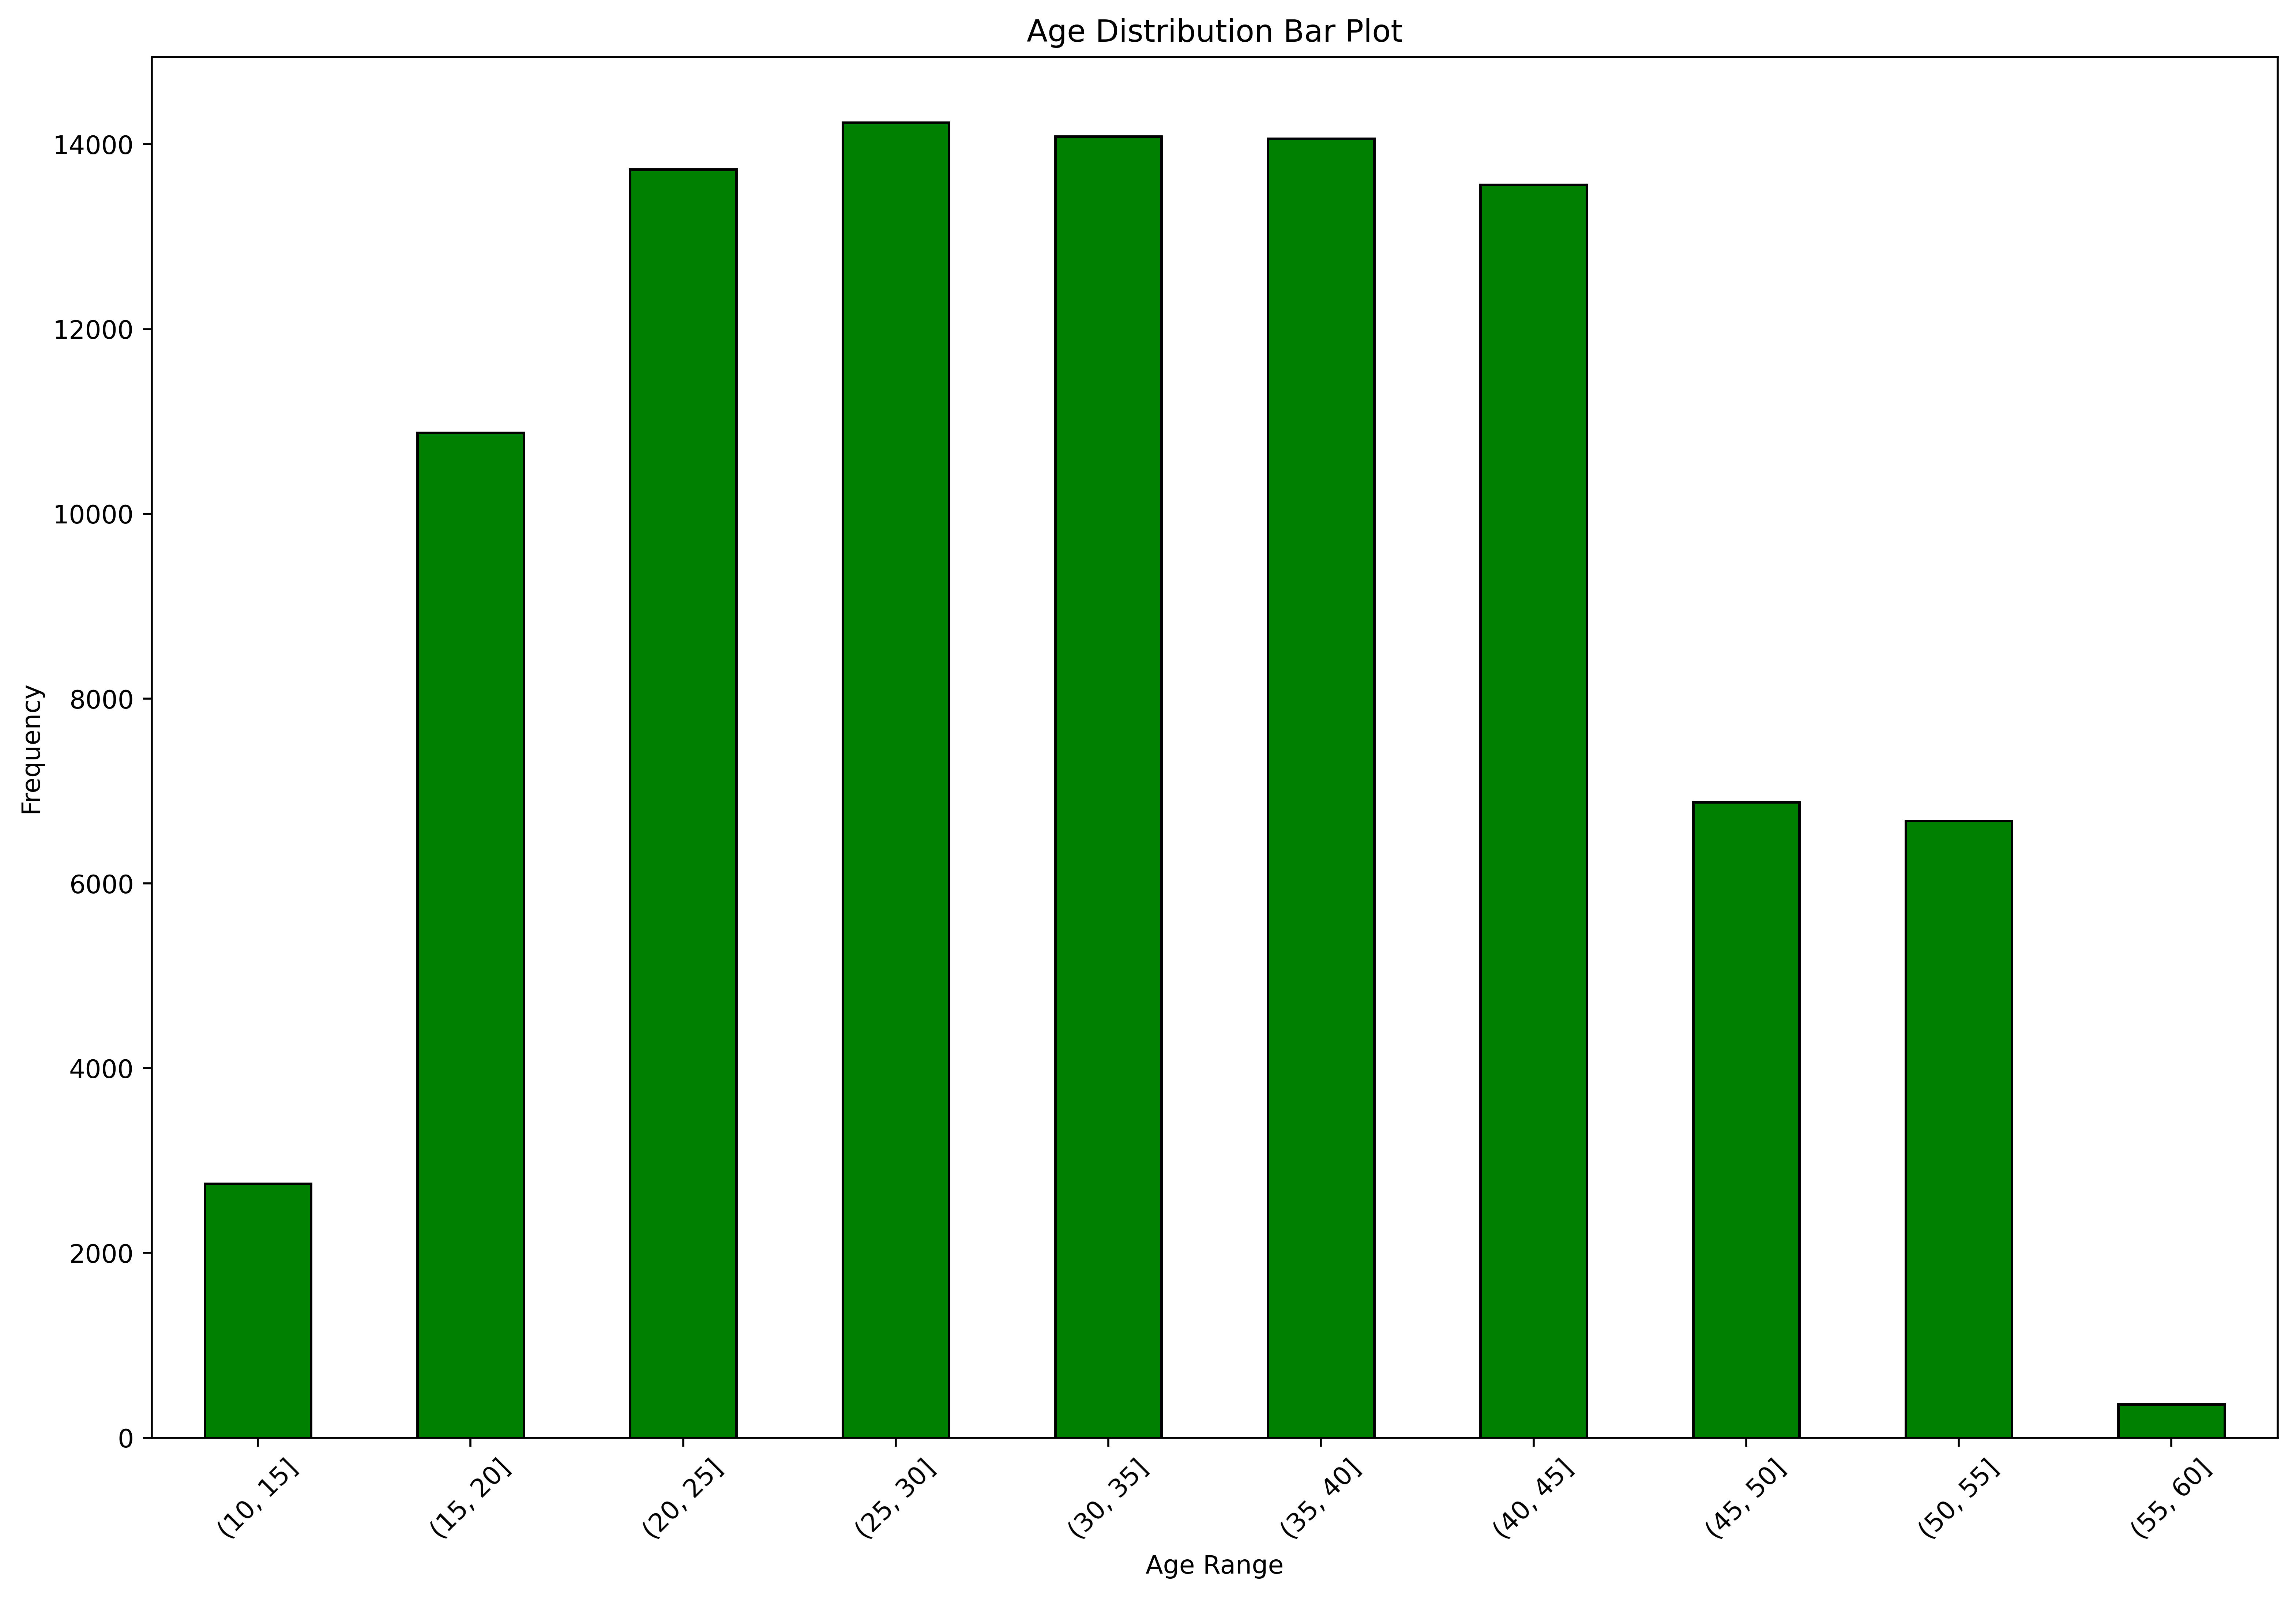

In [998]:
age_bins = range(10,65,5)  # Define your age ranges
plt.figure(figsize=(15,10),dpi=500)

# Use pd.cut to categorize ages into bins and get the frequency count
delay_ranges = pd.cut(drop_df["Age"], bins=age_bins)
delay_counts = delay_ranges.value_counts().sort_index()

# Create a bar plot
delay_counts.plot(kind='bar', color='green', edgecolor='black')

# Customize the plot
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Age Distribution Bar Plot')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# ------------------OCCUPATION-------------------------


In [999]:
drop_df["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [1000]:
drop_df["Occupation"].replace("_______",np.nan,inplace=True)

In [1001]:
drop_df["Occupation"]=drop_df["Occupation"].astype("object")

In [1002]:
drop_df["Occupation"].value_counts()

Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [1003]:
# from sklearn.

In [1004]:
drop_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
0,23.0,Scientist,19114.12,1824.843333,3,7,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,0
1,23.0,Scientist,19114.12,NaN,-1,NaN,4.0,Good,809.98,31.944960,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,0
2,NaN,Scientist,19114.12,NaN,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,0
3,23.0,Scientist,19114.12,NaN,5,4,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,0
4,23.0,Scientist,19114.12,1824.843333,6,NaN,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,23,7,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,1
99996,25.0,Mechanic,39628.99,3359.415833,18,7,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,1
99997,25.0,Mechanic,39628.99,3359.415833,27,6,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,1
99998,25.0,Mechanic,39628.99,3359.415833,20,NaN,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,2


In [1005]:
krna=['Age', 'Occupation', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

# -------------------------Delay_from_due_date--------------------------

In [1006]:
drop_df["Delay_from_due_date"].value_counts().sort_index()

-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: Delay_from_due_date, Length: 73, dtype: int64

In [1007]:
drop_df["Delay_from_due_date"].isnull().sum()

0

In [1008]:
drop_df["Delay_from_due_date"] = drop_df["Delay_from_due_date"].apply(lambda x: max(x, 0))


# ------------------Num_of_Delayed_Payment-----------------------


In [1009]:
drop_df["Num_of_Delayed_Payment"].isnull().sum()

7002

Here the Num_of_Delayed_Payment columns has around 7k null values dropping them dirctly could mean a significant data loss.
Also directly imputating it with mean is also a bad idea consdering the fact that it could be depended on some other factor.
So insted we will see the correleation of this column with other variables and then decide which column should be used to take out some metric.

In [1010]:
def filter_(value:str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value
drop_df["Num_of_Delayed_Payment"]= drop_df["Num_of_Delayed_Payment"].apply(filter_)

In [1011]:
drop_df["Num_of_Delayed_Payment"]= drop_df["Num_of_Delayed_Payment"].astype("float64")

In [1012]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       97219 non-null   float64
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    92998 non-null   float64
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  object 
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Credit_History_Age        90970 non-null   object 
 11  Payment_of_Min_Amount     100000 non-null  object 
 12  Total_EMI_per_month       100000 non-null  float64
 13  Payment_Behaviour         100000 non-null  ob

# ------------Num_Credit_Inquiries-----------------

In [1013]:
drop_df["Num_Credit_Inquiries"].isnull().sum()

1965

<Axes: >

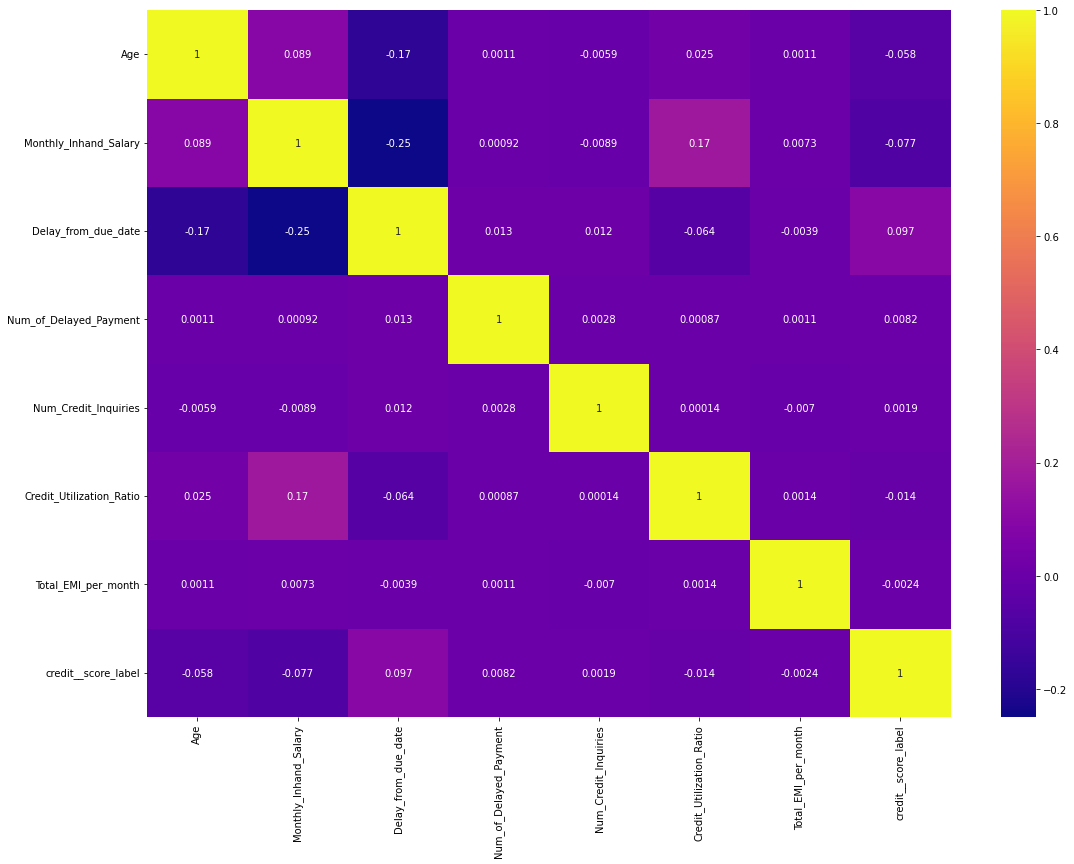

In [1014]:
plt.figure(figsize=(18,13))
sns.heatmap(drop_df.corr(),annot=True,cmap="plasma")

# -------------------Annual_Income------------------

In [1015]:
drop_df["Annual_Income"].value_counts()

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64

In [1016]:
drop_df["Annual_Income"] = drop_df["Annual_Income"].apply(filter_col)
drop_df["Annual_Income"] = drop_df["Annual_Income"].astype(float)

In [1017]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       97219 non-null   float64
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    92998 non-null   float64
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  object 
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Credit_History_Age        90970 non-null   object 
 11  Payment_of_Min_Amount     100000 non-null  object 
 12  Total_EMI_per_month       100000 non-null  float64
 13  Payment_Behaviour         100000 non-null  ob

In [1018]:
krna=[ 'Occupation', 
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
        
        
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
      'Total_EMI_per_month', 

      
      'Payment_Behaviour', 'Monthly_Balance']

# -----------------Monthly_Balance-----------------

In [1019]:
drop_df["Monthly_Balance"].isnull().sum()

1200

In [1020]:
drop_df["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [1021]:
drop_df['Monthly_Balance']=drop_df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)
drop_df['Monthly_Balance']=drop_df['Monthly_Balance'].astype("float")

In [1022]:
drop_df['Monthly_Balance']=drop_df['Monthly_Balance'].fillna(drop_df["Monthly_Balance"].mean())
drop_df['Monthly_Balance']=drop_df['Monthly_Balance'].round(3)

In [1023]:
drop_df["Monthly_Balance"].isnull().sum()

0

# ---------------Credit_History_Age------------------


In [1024]:
years  = []
months = []
for value in drop_df["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
drop_df['Credit_Age_years'] = pd.Series(years)
drop_df['Credit_Age_months'] = pd.Series(months) 
drop_df.drop('Credit_History_Age',axis=1,inplace=True)

In [1025]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       97219 non-null   float64
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    92998 non-null   float64
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  object 
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Payment_of_Min_Amount     100000 non-null  object 
 11  Total_EMI_per_month       100000 non-null  float64
 12  Payment_Behaviour         100000 non-null  object 
 13  Monthly_Balance           100000 non-null  fl

# -----------Credit_Mix------------------

In [1026]:
drop_df["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [1027]:
drop_df['Credit_Mix']=drop_df['Credit_Mix'].replace('_',np.nan)


In [1028]:

lc=LabelEncoder()
drop_df["Credit_Mix"]=lc.fit_transform(drop_df["Credit_Mix"])

# --------------Payment_Behaviour----------------


In [1029]:
drop_df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [1030]:
drop_df["Payment_Behaviour"]=drop_df["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [1031]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
drop_df["Payment_Behaviour"]=l.fit_transform(drop_df["Payment_Behaviour"])

In [1032]:
drop_df["Payment_Behaviour"].ffill(inplace=True)

In [1033]:
drop_df["Payment_Behaviour"]=drop_df["Payment_Behaviour"].astype("int64")

# ---------------Outstanding_Debt------------------------

In [1034]:
drop_df["Outstanding_Debt"].isna().sum()

0

In [1035]:
drop_df["Outstanding_Debt"].value_counts()

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [1036]:
drop_df["Outstanding_Debt"] = drop_df["Outstanding_Debt"].apply(filter_col)
drop_df["Outstanding_Debt"] = drop_df["Outstanding_Debt"].astype(float)

In [1037]:
drop_df["Outstanding_Debt"].value_counts()

1109.03    24
1151.70    24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: Outstanding_Debt, Length: 12203, dtype: int64

# ------------------Num_Credit_Inquiries---------------------

In [1038]:
drop_df["Num_Credit_Inquiries"].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [1039]:
(drop_df["Num_Credit_Inquiries"]<0).sum()

0

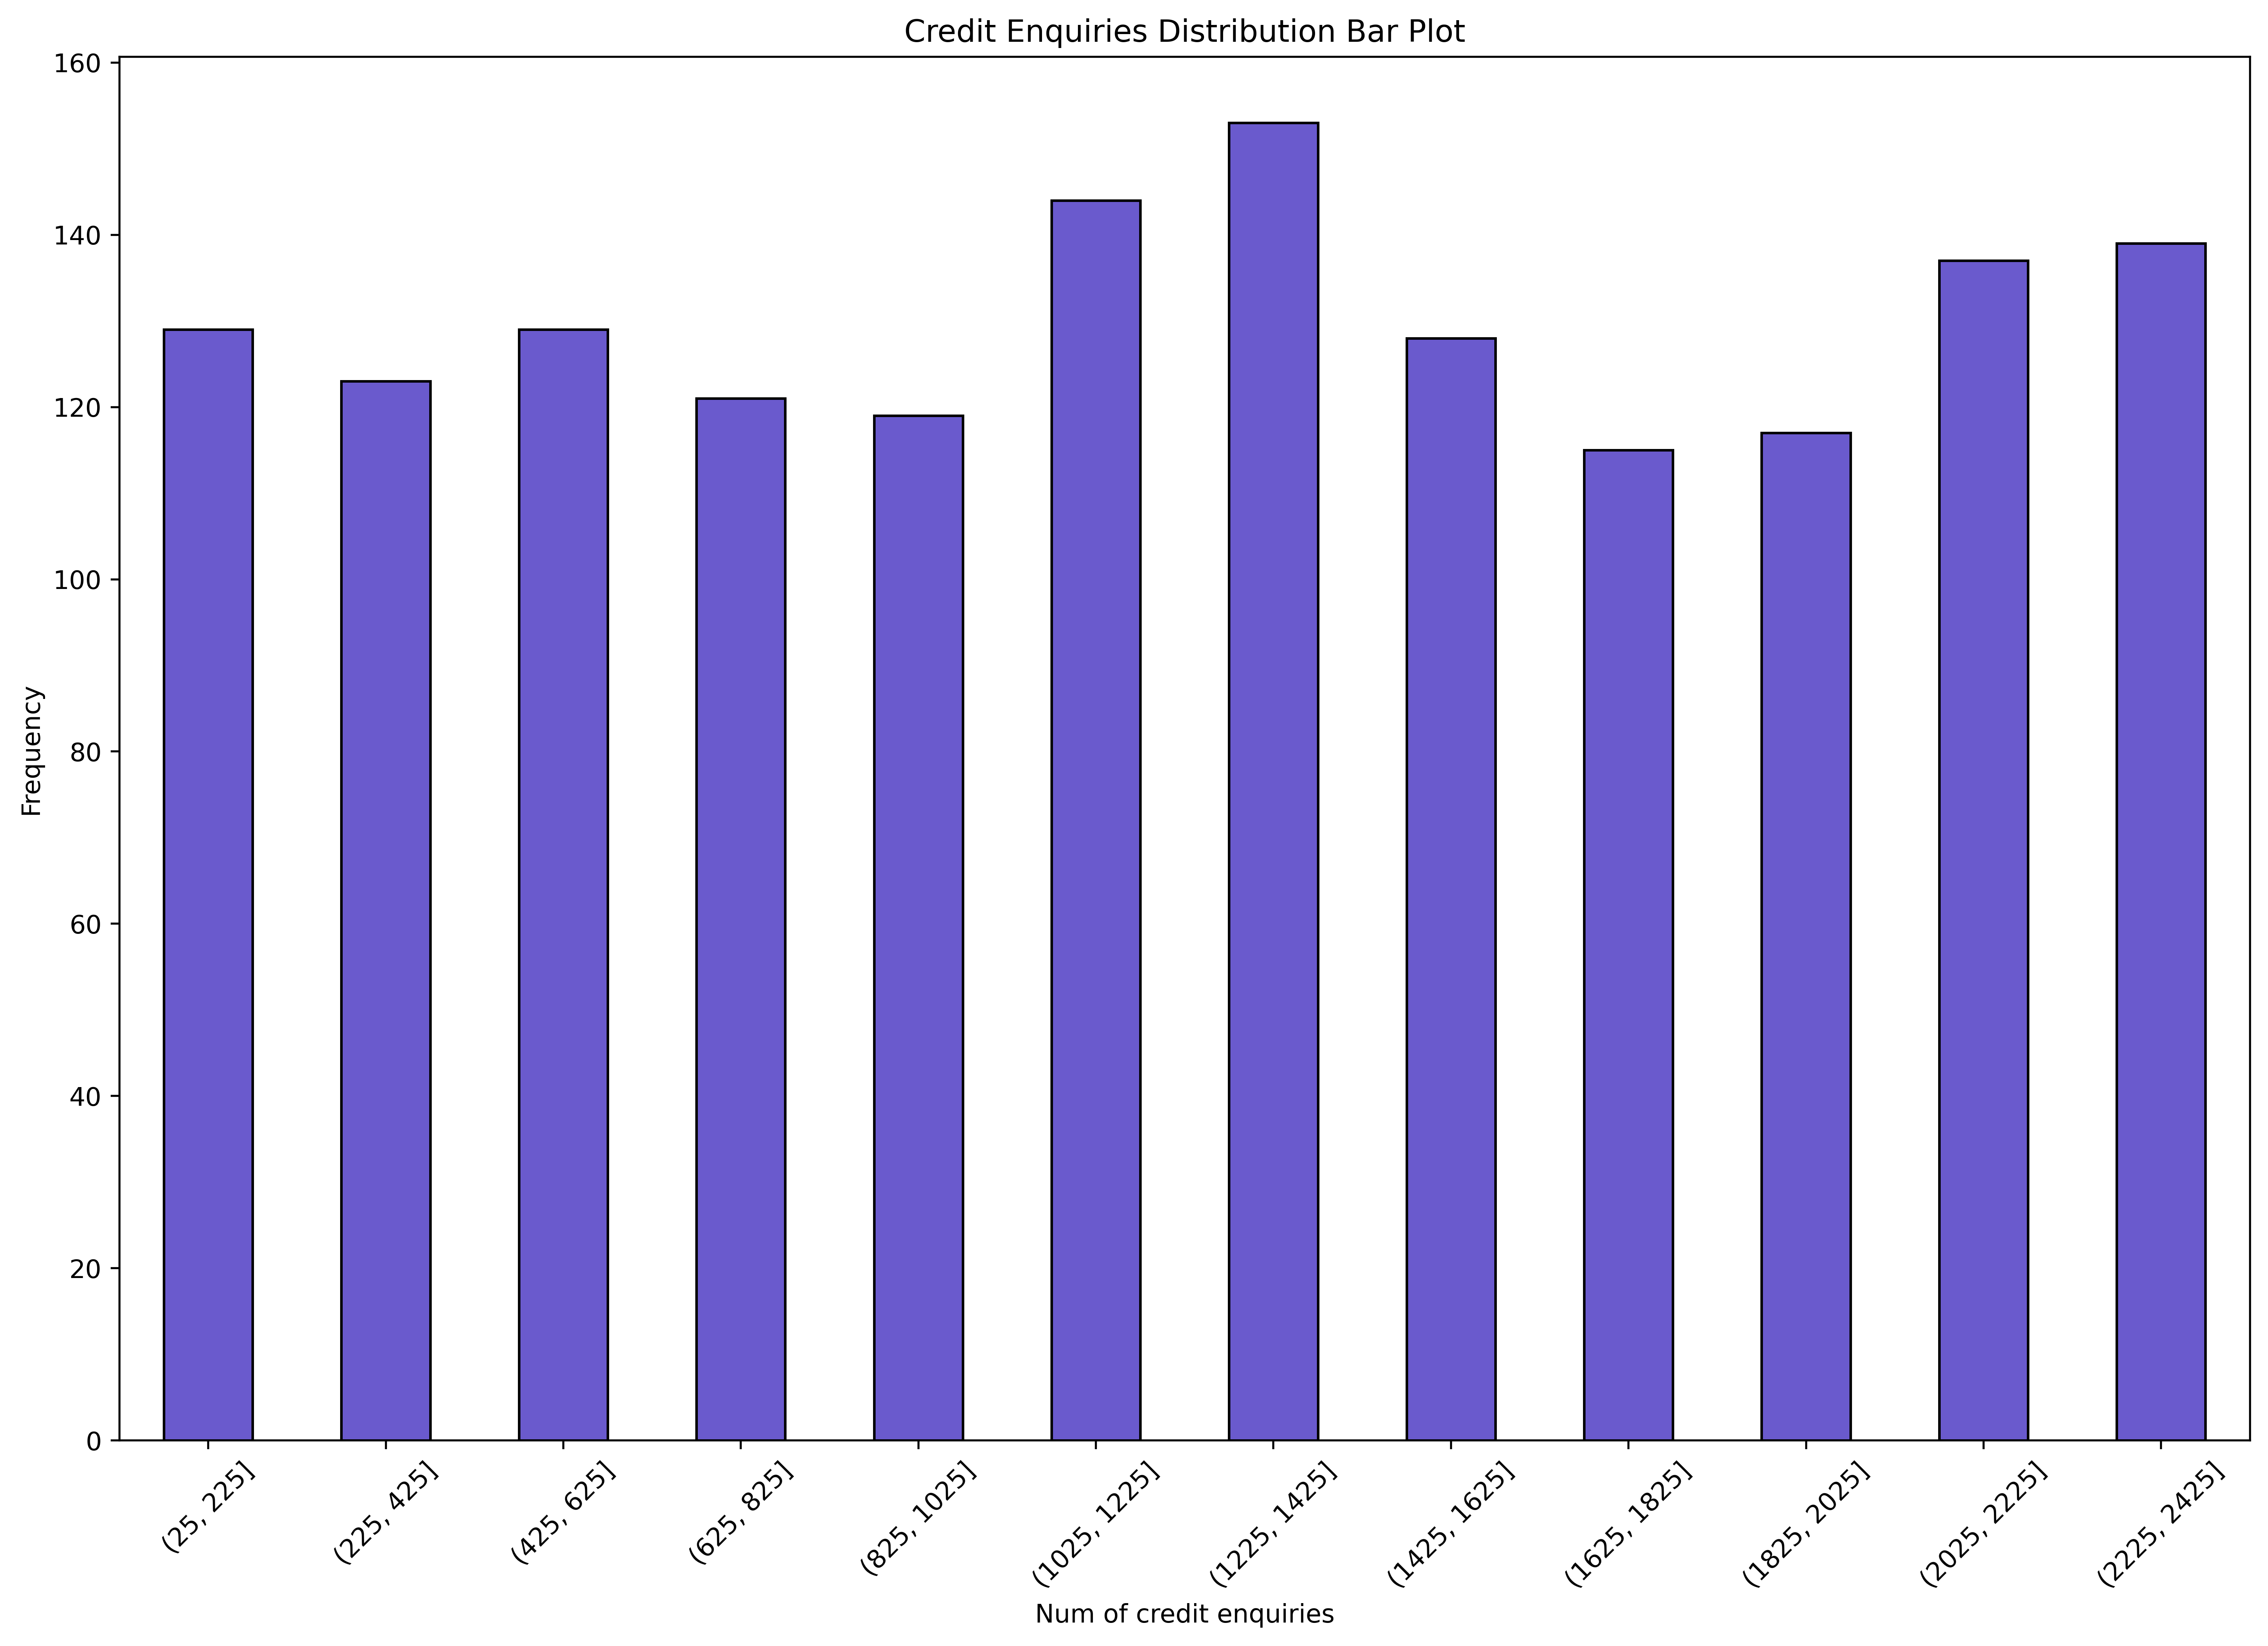

In [1040]:
age_bins = range(25,2600,200)  # Define your age ranges
plt.figure(figsize=(15,10),dpi=500)

# Use pd.cut to categorize ages into bins and get the frequency count
delay_ranges = pd.cut(drop_df["Num_Credit_Inquiries"], bins=age_bins)
delay_counts = delay_ranges.value_counts().sort_index()

# Create a bar plot
delay_counts.plot(kind='bar', color='slateblue', edgecolor='black')

# Customize the plot
plt.xlabel('Num of credit enquiries')
plt.ylabel('Frequency')
plt.title('Credit Enquiries Distribution Bar Plot')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# -------------------Credit_Utilization_Ratio-----------------------


In [1041]:
drop_df["Credit_Utilization_Ratio"]=drop_df["Credit_Utilization_Ratio"].round(3)

# ------------------Total_EMI_per_month----------------------

In [1042]:
drop_df["Total_EMI_per_month"]=drop_df["Total_EMI_per_month"].astype("float").round(3)

In [1043]:
drop_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label,Credit_Age_years,Credit_Age_months
0,23.0,Scientist,19114.12,1824.843333,3,7.0,4.0,3,809.98,26.823,No,49.575,2,312.494,0,22.0,1.0
1,23.0,Scientist,19114.12,NaN,0,NaN,4.0,1,809.98,31.945,No,49.575,3,284.629,0,NaN,NaN
2,NaN,Scientist,19114.12,NaN,3,7.0,4.0,1,809.98,28.609,No,49.575,4,331.210,0,22.0,3.0
3,23.0,Scientist,19114.12,NaN,5,4.0,4.0,1,809.98,31.378,No,49.575,5,223.451,0,22.0,4.0
4,23.0,Scientist,19114.12,1824.843333,6,NaN,4.0,1,809.98,24.797,No,49.575,1,341.489,0,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,23,7.0,3.0,3,502.38,34.664,No,35.104,0,479.866,1,31.0,6.0
99996,25.0,Mechanic,39628.99,3359.415833,18,7.0,3.0,3,502.38,40.566,No,35.104,1,496.652,1,31.0,7.0
99997,25.0,Mechanic,39628.99,3359.415833,27,6.0,3.0,1,502.38,41.256,No,35.104,0,516.809,1,31.0,8.0
99998,25.0,Mechanic,39628.99,3359.415833,20,NaN,3.0,1,502.38,33.638,No,35.104,3,319.165,2,31.0,9.0


In [1044]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       97219 non-null   float64
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    92998 non-null   float64
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Mix                100000 non-null  int64  
 8   Outstanding_Debt          100000 non-null  float64
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Payment_of_Min_Amount     100000 non-null  object 
 11  Total_EMI_per_month       100000 non-null  float64
 12  Payment_Behaviour         100000 non-null  int64  
 13  Monthly_Balance           100000 non-null  fl

In [1045]:
drop_df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'credit__score_label', 'Credit_Age_years',
       'Credit_Age_months'],
      dtype='object')

In [1046]:
drop_df.isnull().sum()

Age                          2781
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Payment_Behaviour               0
Monthly_Balance                 0
credit__score_label             0
Credit_Age_years             9030
Credit_Age_months            9030
dtype: int64

using forward fill (ffill) to impute missing values in the "Occupation" column based on the context of the "Monthly_Inhand_Salary" values. Forward fill is a method commonly used to propagate the last valid observation forward to fill gaps in the data.

In [1047]:
drop_df["Monthly_Inhand_Salary"].value_counts().head(20)     #to know why i use ffill


6769.130000     15
6358.956667     15
2295.058333     15
6082.187500     15
3080.555000     14
4387.272500     13
5766.491667     13
6639.560000     13
536.431250      12
1315.560833     11
2557.861667      9
1476.062917      8
2610.171667      8
9641.480000      8
11624.846667     8
1393.486667      8
1801.474167      8
7554.577500      8
1365.173333      8
1474.625417      8
Name: Monthly_Inhand_Salary, dtype: int64

In [1048]:
drop_df.loc[drop_df["Monthly_Inhand_Salary"] ==1359.206250, "Occupation"] #to know why i use ffill


59144    Manager
59145    Manager
59146        NaN
59147    Manager
59148    Manager
59149    Manager
59150    Manager
59151    Manager
Name: Occupation, dtype: object

In [1049]:
drop_df['Occupation'].ffill(inplace=True)


In [1050]:
drop_df["Monthly_Inhand_Salary"].value_counts().head(10)
drop_df.loc[drop_df["Monthly_Inhand_Salary"] ==1359.206250, "Occupation"] 
drop_df.drop('Monthly_Inhand_Salary',axis=1,inplace=True)



In [1051]:
encoder = OneHotEncoder()
encoded_pay_min_amt= encoder.fit_transform(drop_df[["Payment_of_Min_Amount"]])
df_encoded = pd.DataFrame(encoded_pay_min_amt.toarray(), columns=encoder.get_feature_names_out(["Payment_of_Min_Amount"]))
combined_df = pd.concat([drop_df, df_encoded], axis=1)
combined_df.drop('Payment_of_Min_Amount',axis=1,inplace=True)

In [1052]:
# encoder = OneHotEncoder()
# encoded_pay_min_amt= encoder.fit_transform(combined_df[["Occupation"]])
# df_encoded = pd.DataFrame(encoded_pay_min_amt.toarray(), columns=encoder.get_feature_names_out(["Occupation"]))
# combined_df = pd.concat([combined_df, df_encoded], axis=1)
# combined_df.drop('Occupation',axis=1,inplace=True)

In [1053]:
drop_df.isnull().sum()


Age                         2781
Occupation                     0
Annual_Income                  0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Payment_Behaviour              0
Monthly_Balance                0
credit__score_label            0
Credit_Age_years            9030
Credit_Age_months           9030
dtype: int64

In [1054]:
# plt.figure(figsize=(19,13),dpi=500)
# sns.heatmap(combined_df.corr(),annot=True)

In [1055]:
combined_df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Payment_Behaviour', 'Monthly_Balance', 'credit__score_label',
       'Credit_Age_years', 'Credit_Age_months', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes'],
      dtype='object')

In [1056]:
combined_df['credit__score_label'] = combined_df.pop("credit__score_label")

In [1057]:
combined_df.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Age_years,Credit_Age_months,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,credit__score_label
0,23.0,Scientist,19114.12,3,7.0,4.0,3,809.98,26.823,49.575,2,312.494,22.0,1.0,0.0,1.0,0.0,0
1,23.0,Scientist,19114.12,0,NaN,4.0,1,809.98,31.945,49.575,3,284.629,NaN,NaN,0.0,1.0,0.0,0
2,NaN,Scientist,19114.12,3,7.0,4.0,1,809.98,28.609,49.575,4,331.210,22.0,3.0,0.0,1.0,0.0,0
3,23.0,Scientist,19114.12,5,4.0,4.0,1,809.98,31.378,49.575,5,223.451,22.0,4.0,0.0,1.0,0.0,0
4,23.0,Scientist,19114.12,6,NaN,4.0,1,809.98,24.797,49.575,1,341.489,22.0,5.0,0.0,1.0,0.0,0


In [1058]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        97219 non-null   float64
 1   Occupation                 100000 non-null  object 
 2   Annual_Income              100000 non-null  float64
 3   Delay_from_due_date        100000 non-null  int64  
 4   Num_of_Delayed_Payment     92998 non-null   float64
 5   Num_Credit_Inquiries       98035 non-null   float64
 6   Credit_Mix                 100000 non-null  int64  
 7   Outstanding_Debt           100000 non-null  float64
 8   Credit_Utilization_Ratio   100000 non-null  float64
 9   Total_EMI_per_month        100000 non-null  float64
 10  Payment_Behaviour          100000 non-null  int64  
 11  Monthly_Balance            100000 non-null  float64
 12  Credit_Age_years           90970 non-null   float64
 13  Credit_Age_months          909

In [1059]:
# from sklearn.preprocessing import LabelEncoder
# l=LabelEncoder()
# combined_df["Occupation"]=l.fit_transform(combined_df["Occupation"])

In [1060]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        97219 non-null   float64
 1   Occupation                 100000 non-null  object 
 2   Annual_Income              100000 non-null  float64
 3   Delay_from_due_date        100000 non-null  int64  
 4   Num_of_Delayed_Payment     92998 non-null   float64
 5   Num_Credit_Inquiries       98035 non-null   float64
 6   Credit_Mix                 100000 non-null  int64  
 7   Outstanding_Debt           100000 non-null  float64
 8   Credit_Utilization_Ratio   100000 non-null  float64
 9   Total_EMI_per_month        100000 non-null  float64
 10  Payment_Behaviour          100000 non-null  int64  
 11  Monthly_Balance            100000 non-null  float64
 12  Credit_Age_years           90970 non-null   float64
 13  Credit_Age_months          909

In [1061]:
# plt.figure(figsize=(25,16))
# sns.heatmap(combined_df.corr(),annot=True)

In [1062]:
# print(combined_df.columns,sorted(combined_df.corr()["credit__score_label"]))

In [1063]:
import pandas as pd

# Assuming 'combined_df' is your DataFrame
# Replace this with your actual DataFrame

# Print column names
# print("Column Names:", combined_df.columns)

# Calculate and print correlation values with respect to "credit__score_label"
correlation_values = abs(combined_df.corr()["credit__score_label"]).sort_values()
print("Sorted Correlation Values:")
print(correlation_values)


Sorted Correlation Values:
Credit_Age_months            0.000808
Num_Credit_Inquiries         0.001929
Total_EMI_per_month          0.002369
Annual_Income                0.002906
Num_of_Delayed_Payment       0.008163
Payment_of_Min_Amount_NM     0.009854
Credit_Utilization_Ratio     0.014370
Payment_Behaviour            0.018793
Outstanding_Debt             0.037153
Monthly_Balance              0.058271
Age                          0.058464
Delay_from_due_date          0.097419
Credit_Age_years             0.102157
Credit_Mix                   0.144913
Payment_of_Min_Amount_Yes    0.243400
Payment_of_Min_Amount_No     0.247100
credit__score_label          1.000000
Name: credit__score_label, dtype: float64


In [1064]:
combined_df.isnull().sum()

Age                          2781
Occupation                      0
Annual_Income                   0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Age_years             9030
Credit_Age_months            9030
Payment_of_Min_Amount_NM        0
Payment_of_Min_Amount_No        0
Payment_of_Min_Amount_Yes       0
credit__score_label             0
dtype: int64

In [1065]:
numerical_data = []
object_data = []

for column in combined_df.columns:
    if combined_df.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)
imputer = KNNImputer(n_neighbors=5)
combined_df[numerical_data] = imputer.fit_transform(combined_df[numerical_data])


In [1066]:
combined_df.isnull().sum()


Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Age_years             0
Credit_Age_months            0
Payment_of_Min_Amount_NM     0
Payment_of_Min_Amount_No     0
Payment_of_Min_Amount_Yes    0
credit__score_label          0
dtype: int64

In [1067]:
# Create a contingency table for each categorical column
table={}
for col in combined_df.columns:
    contingency_table = pd.crosstab(combined_df[col],combined_df['credit__score_label'])
    # Apply the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}\n")
    table[col]={"Chi-square":chi2,"P":p}
    # print(f"Expected frequencies table:\n{expected}\n")

Chi-square test results for Age:
Chi-square statistic: 5229.7941235488015
P-value: 0.0
Degrees of freedom: 414

Chi-square test results for Occupation:
Chi-square statistic: 181.1000250439237
P-value: 2.4338587925736514e-24
Degrees of freedom: 28

Chi-square test results for Annual_Income:
Chi-square statistic: 134413.15470134554
P-value: 0.0
Degrees of freedom: 26972

Chi-square test results for Delay_from_due_date:
Chi-square statistic: 24626.21630538984
P-value: 0.0
Degrees of freedom: 134

Chi-square test results for Num_of_Delayed_Payment:
Chi-square statistic: 20540.304751840395
P-value: 0.0
Degrees of freedom: 2120

Chi-square test results for Num_Credit_Inquiries:
Chi-square statistic: 24757.520917864946
P-value: 0.0
Degrees of freedom: 2820

Chi-square test results for Credit_Mix:
Chi-square statistic: 32349.29941440455
P-value: 0.0
Degrees of freedom: 6

Chi-square test results for Outstanding_Debt:
Chi-square statistic: 131136.80570514553
P-value: 0.0
Degrees of freedom: 244

In [1068]:
for col, values in table.items():
    if values['P']>0.05:
        print(f"{col}:\nChi-square: {values['Chi-square']}      P-value: {values['P']:<20}\n")

Credit_Utilization_Ratio:
Chi-square: 41248.72581686868      P-value: 0.1633416447042912  

Monthly_Balance:
Chi-square: 179753.8132882256      P-value: 0.08439107433520428 

Credit_Age_months:
Chi-square: 90.62211694810793      P-value: 0.6889520016788552  



since p value is >0.05 significance level we are dropping these columns

In [1069]:
combined_df.drop(["Credit_Utilization_Ratio","Monthly_Balance","Credit_Age_months"],axis=1,inplace=True)


In [1072]:
x= combined_df.drop("credit__score_label",axis=1)
y=combined_df['credit__score_label']
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=42)

Balanced Data

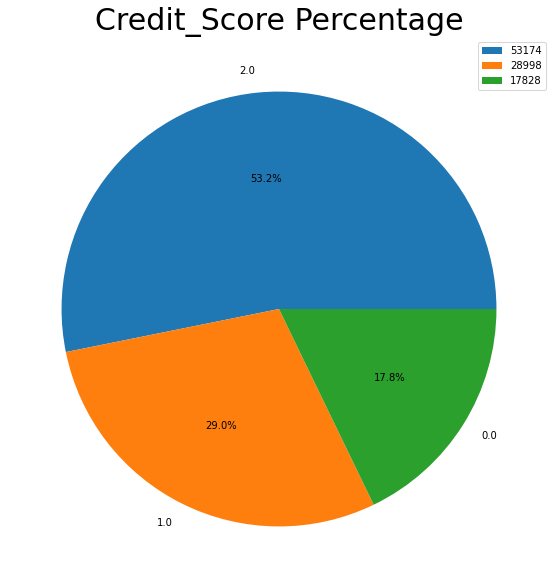

In [1073]:
labels = combined_df["credit__score_label"].value_counts().index
sizes = combined_df["credit__score_label"].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(combined_df["credit__score_label"].value_counts())
plt.show()